<a href="https://colab.research.google.com/github/1991Ab/Capstone-project-2-Taxi-trip-time-Prediction/blob/main/Taxi_trip_time_Prediction_individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a= input()
b= input()
print(a)
print(b)

m

m



# **Project Name**    -  NYC Taxi Trip Time Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.1/571.1 KB 11.9 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
# Load Dataset
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Importing the dataset
file_path = "/content/drive/MyDrive/Capstone project-2/NYC Taxi Data (1).csv"
df = pd.read_csv(file_path)


### Dataset First View

In [ ]:
# Dataset First 
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns 
df.shape

(1458644, 11)

We can see that the NYC taxi trip time prediction data set contains 1458644 rows and 11 columns

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Here we see the details of each column present in the dataset such as  their data type and count of values 

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

It is very essential to check if our data set has any duplicate values and remove them if any.We can find out the duplicate values using the function dataset.duplicated().  len(dataset[dataset.duplicated()]) gives the count of duplicate values.From the above code we can see that there are no duplicate values in the dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


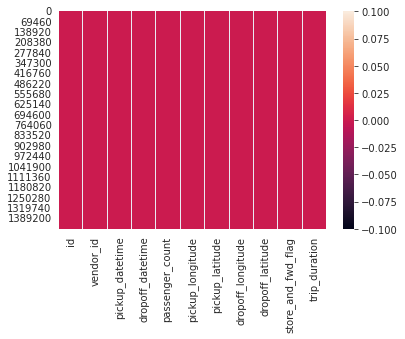

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=True)

It is very important to check for missing values or NAN values as it has a very high impact on the model.Hence identifying the NAN values and treating them becomes very important.From the above data and graph we can see that the dataset has no missing or NAN values.

### What did you know about your dataset?

The dataset given is based on the  NYC Yellow Cab trip record data.We have to predict the taxi trip duration of various rides using various Machine Learning models.The data set has 'trip_duration' as a continous target variable and many independent variables like 'passenger_count' , 'pickup_datetime' , 'dropoff_datetime' etc.The  dataset has 1458644 rows and 11 columns.It has no NAN values and duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


### Variables Description 

The following are the variables used in dataset

* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")
#df.nunique()

No. of unique values in  id is 1458644 .
No. of unique values in  vendor_id is 2 .
No. of unique values in  pickup_datetime is 1380222 .
No. of unique values in  dropoff_datetime is 1380377 .
No. of unique values in  passenger_count is 10 .
No. of unique values in  pickup_longitude is 23047 .
No. of unique values in  pickup_latitude is 45245 .
No. of unique values in  dropoff_longitude is 33821 .
No. of unique values in  dropoff_latitude is 62519 .
No. of unique values in  store_and_fwd_flag is 2 .
No. of unique values in  trip_duration is 7417 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
new_df=df.copy()
# Checking Shape of True Value
new_df.shape


(1458644, 11)

In [ ]:
#calculating the distance between pickup and dropoff locations using haversine formula

In [ ]:
!pip  install haversine
from numpy import math
from haversine import haversine
def trip_distance(df) :
  trip_pickup=(df['pickup_latitude'], df['pickup_longitude'])
  trip_dropoff=(df['dropoff_latitude'], df['dropoff_longitude'])
  return haversine(trip_pickup , trip_dropoff)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#calculating the distance and creating a new column "distance" in the dataset
df['distance']=df.apply(lambda x:trip_distance(x) , axis=1)

In [ ]:
df['distance'].reset_index


<bound method Series.reset_index of 0          1.498523
1          1.805510
2          6.385107
3          1.485500
4          1.188590
             ...   
1458639    1.225082
1458640    6.049844
1458641    7.824617
1458642    1.092565
1458643    1.134044
Name: distance, Length: 1458644, dtype: float64>

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225082
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092565


Calculating the customer with highest trip distance


In [ ]:
max_distance=df.groupby('id')['distance'].max().reset_index().sort_values(by='distance' , ascending=False)

In [ ]:
max_distance

,id,distance
841964,id2306955,1240.910391
551454,id1510552,891.215334
418714,id1146400,578.843617
965050,id2644780,574.876237
365565,id1001696,562.235965
...,...,...
45393,id0124833,0.000000
836696,id2292555,0.000000
1354540,id3715212,0.000000
435164,id1191323,0.000000


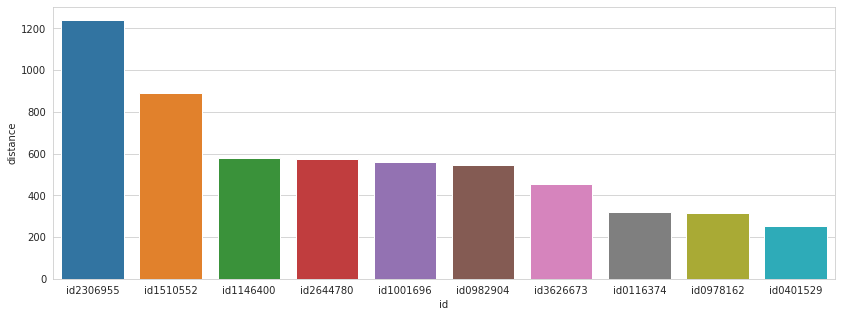

In [ ]:
#Graphical Representation
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,5)
sns.barplot(x='id' , y='distance' ,  data=max_distance.head(10))

We can see from the above plot that customer id'id2306955' has the highest distance for trip 

In [ ]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
distance              float64
dtype: object

In [ ]:
#Changing the data type of variables 'pickup_datetime' and 'dropoff_datetime' to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df["year"] = df["pickup_datetime"].apply(lambda x: x.year)
df["pickup_month"] = df["pickup_datetime"].apply(lambda x: x.month)
df["dropoff_month"] = df["dropoff_datetime"].apply(lambda x: x.month)
df["pickup_day"] = df["pickup_datetime"].apply(lambda x: x.weekday())
df["dropoff_day"] = df["dropoff_datetime"].apply(lambda x: x.weekday())
df["dropoff_time_hour"] = df["dropoff_datetime"].apply(lambda x: x.hour)
df["dropoff_time_min"] = df["dropoff_datetime"].apply(lambda x: x.minute)
df["pick_up_time_hour"] = df["pickup_datetime"].apply(lambda x: x.hour)
df["pick_up_time_min"] = df["pickup_datetime"].apply(lambda x: x.minute)
df.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance,year,pickup_month,dropoff_month,pickup_day,dropoff_day,dropoff_time_hour,dropoff_time_min,pick_up_time_hour,pick_up_time_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.498523,2016,3,3,0,0,17,32,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1.805510,2016,6,6,6,6,0,54,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,6.385107,2016,1,1,1,1,12,10,11,35


## Number of pickups done on each day of the week

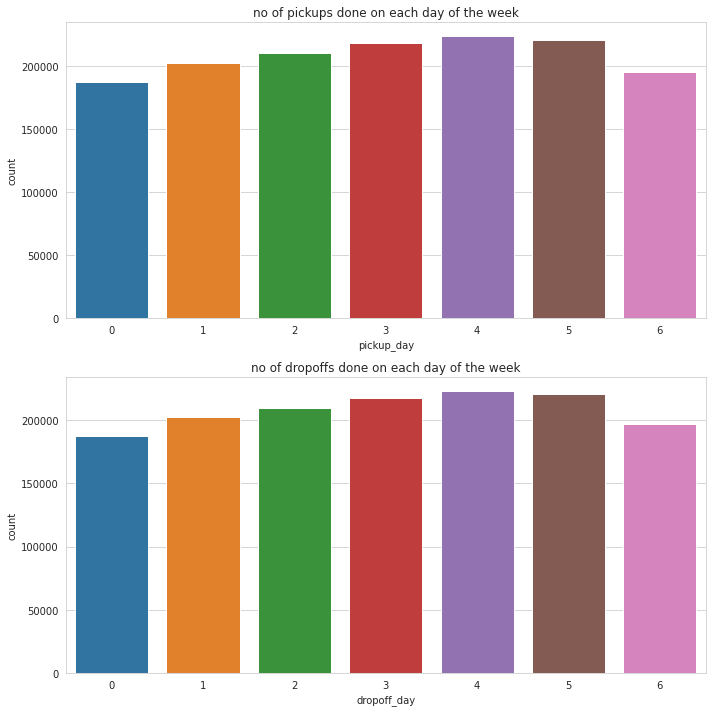

In [ ]:
figure, ax = plt.subplots(nrows=2, ncols = 1, figsize = (10,10))
sns.countplot(x = 'pickup_day', data = df, ax = ax[0])
ax[0].set_title('no of pickups done on each day of the week')

sns.countplot(x = 'dropoff_day', data = df, ax=ax[1])
ax[1].set_title('no of dropoffs done on each day of the week')

plt.tight_layout()

In the above plot day-'0' represents 'Monday' and is considerd as the beginning of the week. day-'6' represents Sunday,the end of the week.From the above plot we can see that the number of pickups and dropoffs are maximum for 'Friday' which is represented as day-'4'. 

## Now,let us analyse the trip duration for a  week

duration=df.groupby("pickup_day")['trip_duration'].mean().sort_values(by='trip_duration' , ascending=False)
duration

In [ ]:
duration=df.groupby("pickup_day")['trip_duration'].mean().reset_index().sort_values(by='trip_duration' , ascending=False)
duration

,pickup_day,trip_duration
3,3,1006.528654
4,4,990.224200
1,1,983.463124
2,2,975.450494
5,5,948.051175
6,6,901.639395
0,0,897.947839


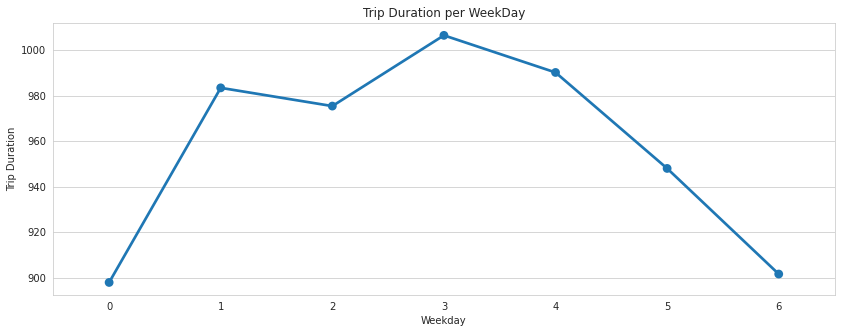

In [ ]:
#Graphical Representation
sns.pointplot(x='pickup_day' , y='trip_duration' , data=duration)
plt.ylabel('Trip Duration')
plt.xlabel('Weekday')
plt.title('Trip Duration per WeekDay')
plt.show()

From the above plot we can infer that the duration of trip is maximum on Thursday represented as day-'3'.

Now let us see the customer who have highest trip duration 

In [ ]:
customer_distance=df.groupby("id")["trip_duration"].mean().reset_index().sort_values(by="trip_duration" , ascending=False)
customer_distance



,id,trip_duration
19503,id0053347,3526282.0
484252,id1325766,2227612.0
134656,id0369307,2049578.0
680749,id1864733,1939736.0
709107,id1942836,86392.0
...,...,...
951864,id2608913,1.0
456530,id1250016,1.0
544652,id1491861,1.0
306594,id0839864,1.0


Now we will find out the number of customers who travel within 30 mins,customers who travel between 30 mins to 1hr and customers who travel from 1hr to 2hr and customers who travel above 2hrs and more.

In [ ]:
#Dividing the dataset on the basis of cutomer travelling time.
#Determining the count of customers who travel within 30 mins
df_travel_time_30=df[df["trip_duration"]<=1800]
df_travel_time_30.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance,year,pickup_month,dropoff_month,pickup_day,dropoff_day,dropoff_time_hour,dropoff_time_min,pick_up_time_hour,pick_up_time_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.498523,2016,3,3,0,0,17,32,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1.805510,2016,6,6,6,6,0,54,0,43
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1.485500,2016,4,4,2,2,19,39,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1.188590,2016,3,3,5,5,13,38,13,30
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,1.098944,2016,1,1,5,5,22,9,22,1


In [ ]:
print(len(df_travel_time_30))

1345526


We can see from the above data that the count of customer travelling within 30 mins is really very large which is around 1345526

In [ ]:
#Determinig the count of customers who travel from 30 mins to 1hour.
df_travel_time_60=df[(df["trip_duration"]<=3600)& (df["trip_duration"]>1800)]
df_travel_time_60.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance,year,pickup_month,dropoff_month,pickup_day,dropoff_day,dropoff_time_hour,dropoff_time_min,pick_up_time_hour,pick_up_time_min
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,6.385107,2016,1,1,1,1,12,10,11,35
16,id3379579,2,2016-04-11 17:29:50,2016-04-11 18:08:26,1,-73.991165,40.755562,-73.999290,40.725353,N,...,3.428091,2016,4,4,0,0,18,8,17,29
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,...,20.602603,2016,6,6,4,4,8,56,8,15
29,id1410897,1,2016-03-23 14:10:39,2016-03-23 14:49:30,1,-73.982117,40.756351,-73.865692,40.770988,N,...,9.939457,2016,3,3,2,2,14,49,14,10
33,id0023813,1,2016-04-17 14:38:30,2016-04-17 15:16:19,1,-73.990311,40.756580,-73.870918,40.773930,N,...,10.238399,2016,4,4,6,6,15,16,14,38


In [ ]:
print(len(df_travel_time_60))

100801


From the above analysis we can see that the number of customers who travel between 30 mins to 1 hour is 100801.It is pretty less compared to number of customer who travel within 30 mins. 

In [ ]:
#Determiming the count of customers who travel between 1 hours to 2 hours.
df_travel_time_2hr=df[(df["trip_duration"]>3600) & (df["trip_duration"]<=(3600*2))]
df_travel_time_2hr.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance,year,pickup_month,dropoff_month,pickup_day,dropoff_day,dropoff_time_hour,dropoff_time_min,pick_up_time_hour,pick_up_time_min
354,id3402983,2,2016-06-30 15:48:06,2016-06-30 17:31:13,1,-73.781898,40.644772,-73.985893,40.760159,N,...,21.455362,2016,6,6,3,3,17,31,15,48
403,id2693863,1,2016-03-18 08:22:10,2016-03-18 09:47:19,1,-73.777184,40.646500,-73.985001,40.760918,N,...,21.650717,2016,3,3,4,4,9,47,8,22
861,id2029339,2,2016-01-22 14:13:46,2016-01-22 15:15:21,1,-73.873360,40.774109,-73.958115,40.775558,N,...,7.138697,2016,1,1,4,4,15,15,14,13
1057,id0631822,2,2016-05-17 14:17:48,2016-05-17 15:26:06,1,-73.995583,40.716949,-73.789101,40.642448,N,...,19.282143,2016,5,5,1,1,15,26,14,17
1113,id3893063,2,2016-06-02 17:32:41,2016-06-02 18:42:43,1,-73.948578,40.778080,-73.781792,40.646790,N,...,20.266766,2016,6,6,3,3,18,42,17,32


In [ ]:
print(len(df_travel_time_2hr))

10064


We can see that the number of customers who travel between 1 hour to 2hour is 10064.

In [ ]:
#Determiming the count of customers who travel for more than 2 hours.
df_travel_time=df[df["trip_duration"]>(3600*2)]
df_travel_time.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance,year,pickup_month,dropoff_month,pickup_day,dropoff_day,dropoff_time_hour,dropoff_time_min,pick_up_time_hour,pick_up_time_min
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,...,2.992821,2016,2,2,5,6,3,33,4,3
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,...,1.176095,2016,5,5,5,6,18,32,18,36
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,...,4.366110,2016,6,6,1,2,12,58,12,58
3092,id0296060,2,2016-06-16 08:07:39,2016-06-16 10:11:39,2,-73.779083,40.647491,-74.006996,40.708523,N,...,20.382520,2016,6,6,3,3,10,11,8,7
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,...,1.859418,2016,2,2,5,6,0,19,0,21


In [ ]:
print(len(df_travel_time))

2253


From the above analysis we can see that the number of customers having travel time of above 2 hours is 2253 which is pretty less compared to the number of customers travelling within 30 mins.

According to a perception we will get a clear view of customers and their tavel 
duration by graphical representaions.However for analysing the customers trip duration it is necessary to deep dive into the data set to unearth many insights.So I have created a new column called "Distance" using the haversine formula.I have analysed the customers with highest  distance and highest trip_duration.
I have broken down the "pickup_datetime" column,"droppoff_datetime" column into 8 columns which are:-
"pickup_month" , "pick_up_time_hr" , "pick_up_time_min" , "pick_up_day",
"dropoff_month" , "dropoff_time_hr" , "dropoff_time_min" , "dropoff_day"
Following are the insights that were analysed:

*   The maximum cabs were booked on "Friday" represented as day-4

*   The highest duration of trip was on "Thursday" reprsented as day-3

*   The highest duration was done by cutomers whose booking id was 'id0053347'.
    It is found out that the trip duration for this trip is 979.52 hours.

*   The highest distance was travelled by the customers whose booking id is
    found to be 'id2306955'.The distance travelled is approximately  1240.91

*   We can see from the  data analysis that the count of customer      
    travelling within 30 mins is really very large which is around '1345526'   

*   From the above analysis it is inferred that the number of customers who 
    travelbetween 30 mins to 1 hour is 100801.It is pretty less compared to   
    number of customer who travel within 30 mins.

*   We can see that the number of customers who travel between 1 hour to 2hour 
    is 10064.It has become less when compared to the number of customer 
    travelling within 30 mins and number of customer travelling between 30 mins
    to 1 hour

*   From the above analysis we can see that the number of customers having  
    travel time of above 2 hours is 2253 which is very less compared to the  
    number of customers travelling within 2hrs.















## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Horizontal Bar plot on Dependant Variable i.e., Trip Duration (Univariate)

In [ ]:
# Chart - 1 visualization code
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,5)

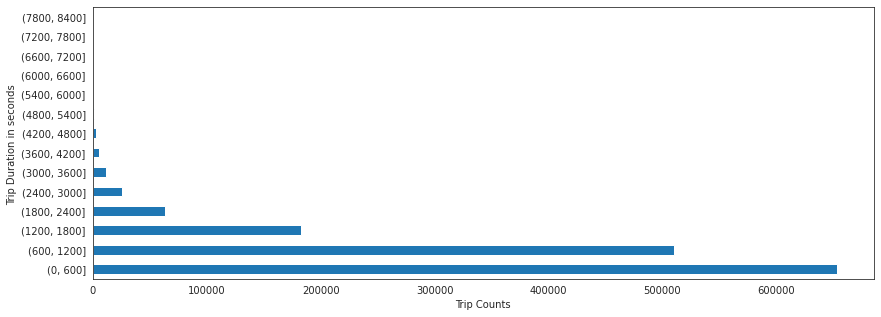

In [ ]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(0,9000,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration in seconds ')
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph is used to compare data among categories.It also shows the  counts of values for the different levels of a categorical or nominal variable.To visualize the number of trip counts for various set of trip durations,I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above plot I got to know that the amount of customers who travel between 0-600 seconds is very large.A lot of people prefer to do short trips in taxi cab wherein the duration is within 10mins.Very few people are booking cabs for longer trips.The number of trips is decresing with the increase in trip duration.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As a taxi cab owner It will be important to analyse the trips that are being booked.Wheather they are  longer trips where the trip duration is more tha an a hour or shorter trips where in the trip ends within 10 mins.This analysis can help to decide the fare of each trip and where to concentrate more number of cabs.

#### Chart - 2 - Countplot for Vendor_Id(Univariate)

Text(0.5, 1.0, 'Market Share Of Vendor Id')

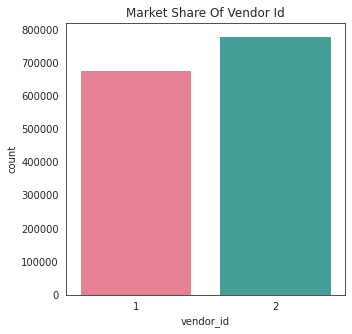

In [ ]:
# Chart - 2 visualization code
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (5,5)
sns.countplot(df["vendor_id"], palette="husl").set_title("Market Share Of Vendor Id")

##### 1. Why did you pick the specific chart?

Countplot Shows the counts of observations in each categorical bin using bars.I used count plot to visualise the categorical feature 'vendor_id' to analyse which vendor has more market share

##### 2. What is/are the insight(s) found from the chart?

From the above plot I got to know that there are two vendors who are providing cab services which are 'Vendor_id1' and 'Vendor_id2'.From the countplot it is evident that  'Vendor_id2' has more number of customers than Vendor_id1'



```
`[# This is formatted as code](https:// [link text](https://))`
```

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,as a cab owner it becomes important to analyse which all are vendors who are making a high profit and are more popular among the pepole.It will also be crucial to get to know the factors that are leading to more popularity among the people which inturn leads to a high market share  

#### Chart - 3 - Pie chart on "Store_Forward" flag(Univariate)

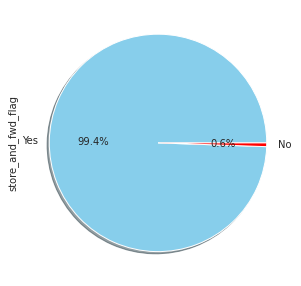

In [ ]:
# Chart - 3 visualization code
df["store_and_fwd_flag"].value_counts().plot(kind="pie" , labels=['Yes' , 'No'] , autopct="%1.1f%%" , shadow=True , colors=['skyblue' , 'red'] , explode=[0,0])

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data.Each slice represents one component and all slices added together equal the whole.It becomes easy to visualize data with pie charts and each slice can be analysed easily.I used pie chart to anlyse "store_and_forward"  flag.


##### 2. What is/are the insight(s) found from the chart?

From the above pie chart I came to know that around 99.4% of cabs record the trip record data before sending it to the vendor.Only around 0.6% of cabs have not recorded the cab data before sending it to the vendor.The trip might not hav been recorded due to either poor infrastructure provided by the vendors or due to signal loss that might have happend during  recording of the trip.However analysis shows that all most all cabs prefer to store the recoeded trip.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above analysis indicates how many of the cabs stotre the trip record before sending it to the vendor.Definetly its helps in creating a positive impact on business.For the taxi companies the trip record data is a very important and crucial data which has to be stored carefully.Storing these types of data help companies to understand the customer needs and can provide better customer satisfaction.Storing the trip record data in vehicle memomry before sending to the vendor means we are duplicating the data.If some mishap happens in the vendor's server end the data will not be destroyed.It can be easily retrived by the vehicle's memory.It sets as an example for good infrastructure and technology provided.Also It helps in providing good customer satisfaction.

#### Chart - 4 - Taxi pick up time vs Passenger count(Bivariate)

> 



In [ ]:
passenger_number=df.groupby("pick_up_time_hour")["passenger_count"].count().reset_index().sort_values(by="passenger_count" , ascending=False)
passenger_number

,pick_up_time_hour,passenger_count
18,18,90600
19,19,90308
21,21,84185
20,20,84072
22,22,80492
17,17,76483
14,14,74292
12,12,71873
15,15,71811
13,13,71473


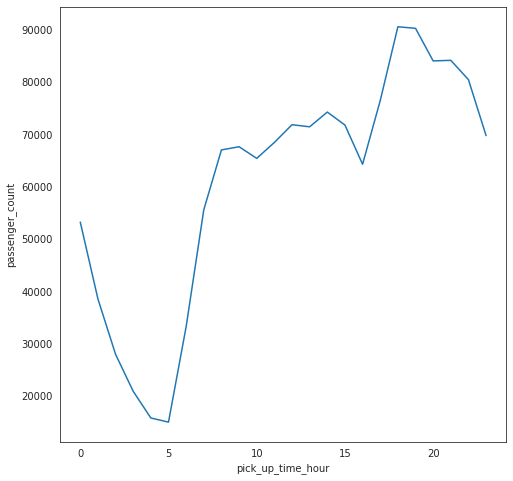

In [ ]:
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (8,8)
sns.lineplot(data=passenger_number, x="pick_up_time_hour", y="passenger_count")


##### 1. Why did you pick the specific chart?

A line chart is used to visualize the change in one variable with the change in time or any other continous variable.I used Line plot to track and visualize the change in the number of passengers onbaording cabs with time.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I came to know that the number of people travelling is maximum at 6:00 PM in the evening.From early morning 1:00 AM till 5 AM the number of people travelling is very minimal.The number of people travelling increases linearly from 5 AM untill 10 AM.After 10 AM till 3 PM there is a very few increase in the number of passengers.It dips at 4.00PM however reaches its peak at 6.00 pm.After 6.00 PM in the evening the number of passengers travelling decreases significantly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,definetly the above analysis will have a positive impact on the business.
As a company running taxi cabs , it becomes very important to analyse at what time most of the people travel so that they can pool in maximum number of cabs at that particular time.At peak hours which from analysis we got to know as 6 PM in the evening and morning 8-10AM the company can come out with some attractive offers and prices to attract maximum number of customers.Also they can come up with car-pooling option to obtain more number of bookings at a given point of time.

#### Chart - 5 - Taxi Trip duration vs Distance(Bivariate)

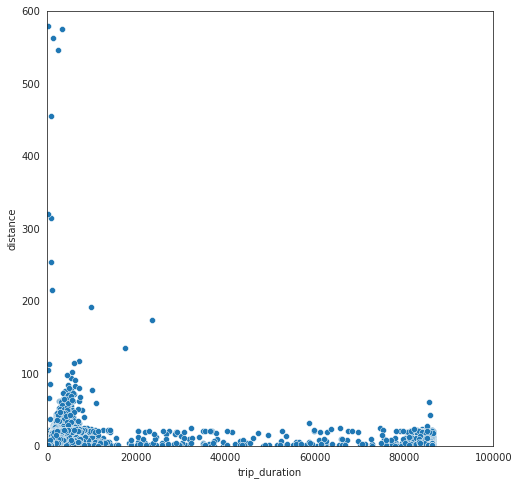

In [ ]:
# Chart - 5 visualization code
# Visualizing Percentage of customers taken international plan
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (8,8)
plt.xlim(0,100000)
plt.ylim(0,600)
sns.scatterplot(x="trip_duration", y="distance", data=df)

##### 1. Why did you pick the specific chart?

A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables in a data set.
I used scatter plot to check how the 'distance' variable is related to the 'trip_duration' variable.

##### 2. What is/are the insight(s) found from the chart?

From the above plot I came to know that 'distance' column and 'trip_duration' are not linearly realted.There were lot of trips whose distance was very minimal nearing to '0' but the time taken to cover them was ranging from 20,000 to 80,000 seconds.Also we can see that in few of the trips very large distance like 600kms were covered in very short period of time which is very unlikley.There are many trips with distance as '0' but have clocked time.This is very unlikely to happen and can be removed. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the analysis found will definetly have a positive impact on the business.
As a cab owner it will be very important to analyse these data of the trip such as what is time taken to cover a particular  distance .It helps to analyse if there is any delay in reaching the destination and the reasons behind it.The reasons can be traffic,bad roads ,bad wheather or even bad driving.

#### Chart - 6 -Month of booking vs number of booking.(Bivariate)

In [ ]:
# Chart - 6  visualization code
# vizualizing code for the months having more number of bookings.
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (8,8)
group1=df.groupby("pickup_month")["id"].count().reset_index().sort_values(by="id" , ascending=False).rename(columns={'id':'Number of Bookings'})
group1

,pickup_month,Number of Bookings
2,3,256189
3,4,251645
4,5,248487
1,2,238300
5,6,234316
0,1,229707


[Text(0.5, 1.0, 'Number of bookings for each month')]

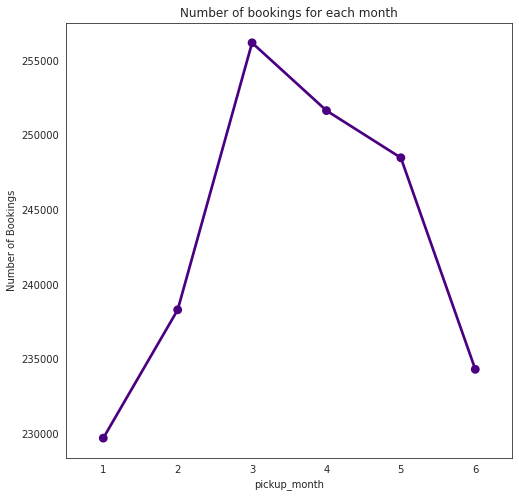

In [ ]:
sns.pointplot(x="pickup_month" , y="Number of Bookings" , data=group1 , color="indigo").set(title="Number of bookings for each month")

##### 1. Why did you pick the specific chart?

Points plots are very usefull in focusing  and explaining on the different levels of comparison of two variables.I used point plot to analyse how the bookings are done during various months of a year. 

##### 2. What is/are the insight(s) found from the chart?

From the above plot I could visualize that the maximum number of cab bookings were done in the months of 'March' , 'April' and May.
Comparitively less bookings are done in the months of 'January' and 'June'.This can be due to weather conditions.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,this analysis will definetly have a positive impact on the business.
The taxi owners and vendors can use this data to come up with more number vehicles during these periods.Also during the months where cab bookings are less the companies can come up with attractive fares and special offers to improve their business.

#### Chart - 7- Determining the relationship between 'Trip_duration' and other variables.

In [ ]:
# Chart - 7 visualization code
col=df.describe().columns
col

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance',
       'year', 'pickup_month', 'dropoff_month', 'pickup_day', 'dropoff_day',
       'dropoff_time_hour', 'dropoff_time_min', 'pick_up_time_hour',
       'pick_up_time_min'],
      dtype='object')

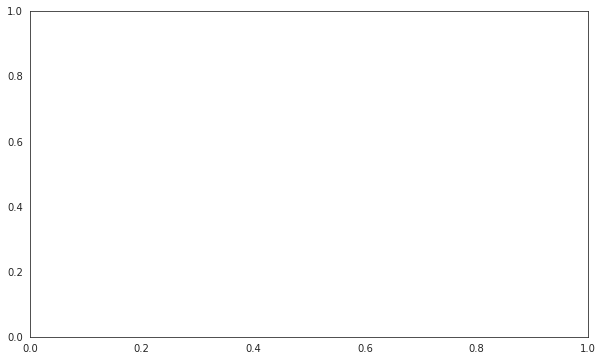

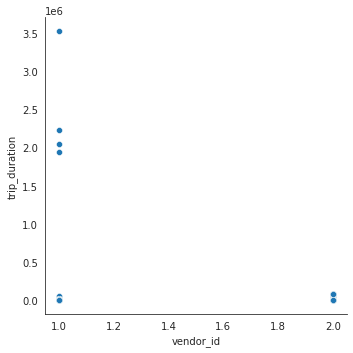

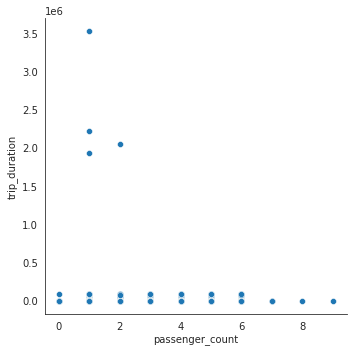

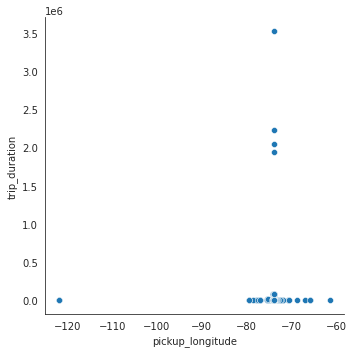

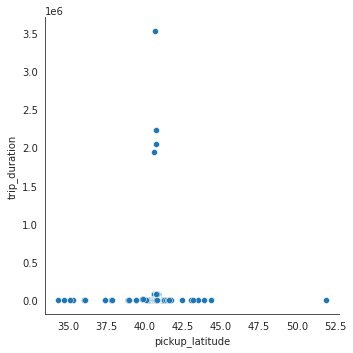

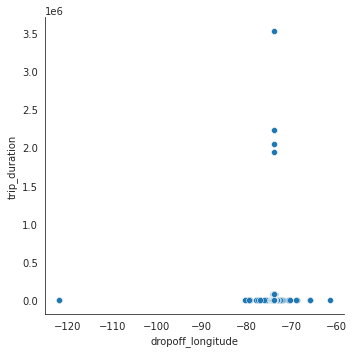

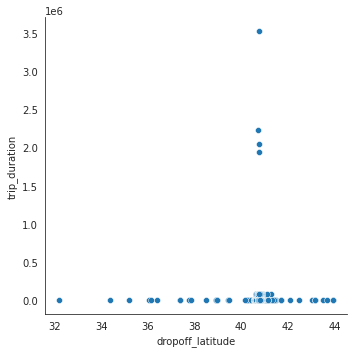

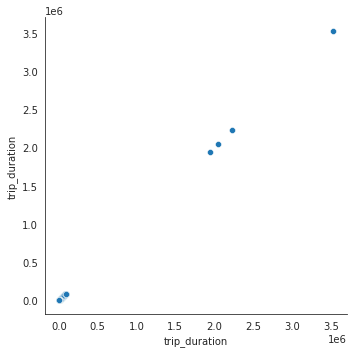

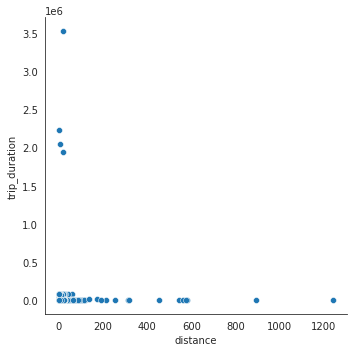

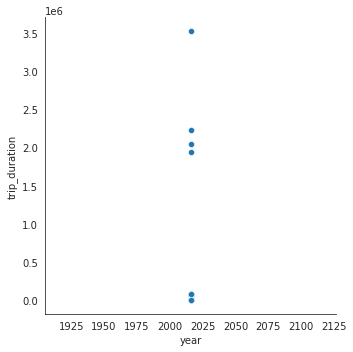

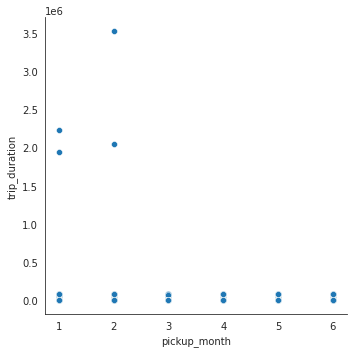

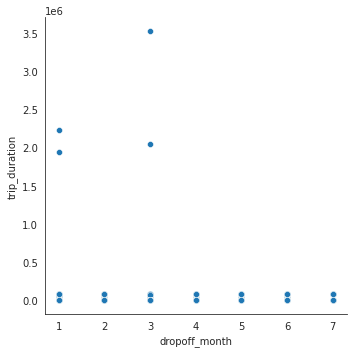

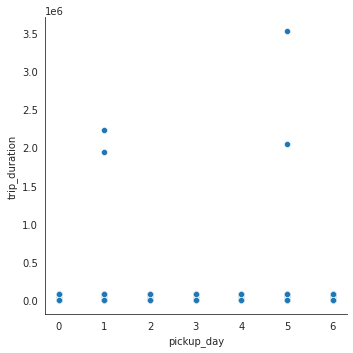

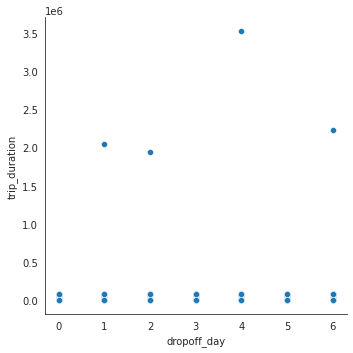

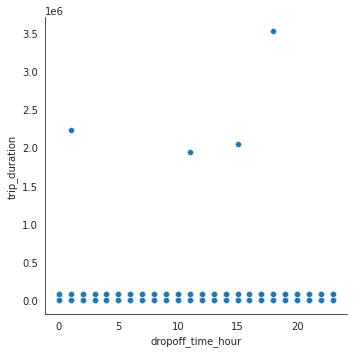

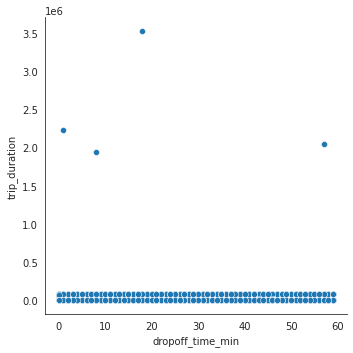

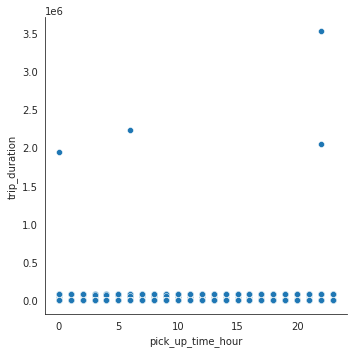

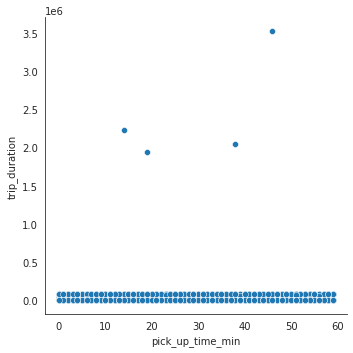

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
for col in col:
  sns.relplot(data=df, x=df[col], y="trip_duration")




##### 1. Why did you pick the specific chart?

The Seaborn Relational Plot (relplot) allows us to visualise how variables within a dataset  are related to each other.It uses scatter plot and when specified line plot to visualize the relationship between the variables in the dataset.I used Relational plot to visualise the realationship present between the dependent variable 'trip_duration' and various other independent variables present in the NYC taxi trip data set. 

##### 2. What is/are the insight(s) found from the chart?

From the above plots we can see the relatioship between the dependent variable 'trip_duration' and other independent variables.From the plots we can figure out that there is no much relationship or linear relationship between the dependent variable and other independent variables.We can only see a slight linear relationship between 'trip_duration' and 'distance'.For rest of all the independent variables there is no  relationship  with target variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Relation plot is to only visualize the relation between the two variables in the dataset.It doesnt have any contribution to the business .


k#### Chart - 9 - Corelation-HeatMap

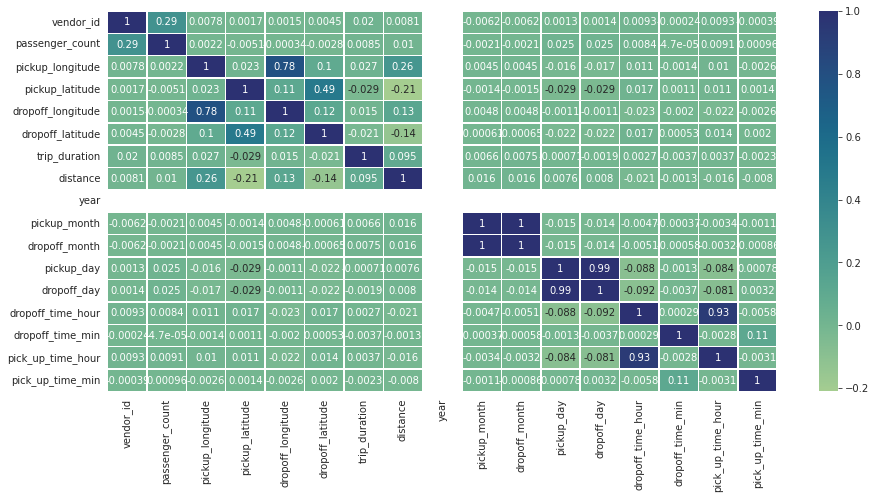

In [ ]:
# Chart - 9- visualization code
# Visualizing the corelation between the variables.
# Correlation Heatmap visualization code

plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), linewidths = 0.5, annot = True ,cmap="crest")








##### 1. Why did you pick the specific chart?

Heat Maps are graphical representations of data that utilize color-coded systems where values are depicted by color.It represents the coefficients to visualize the strength of correlation among variables. It helps find features that are best for Machine Learning model building.It transforms the correlation matrix into color coding .Each cell in the heatmap shows the corelation  between two variables.The corelation values varies from the range [-1,1]

##### 2. What is/are the insight(s) found from the chart?

From the above plot I could infer that there is a high corelation between 'pick_up_time_hour' and 'dropoff_time_hour' which is around 93%.There is also a high corelation between  'pickup_day' and dropoff_day' which is around 99%.There is a slight corelation between 'pickup_longitude' and 'dropoff_longitude' which is around 78%.There is also a slight corelation between the variables 'pickup_latitude' and 'dropoff_latitude' which is around 49% 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


We use HeatMap only to check the corelation between the variables in the datset.This analysis will be very usefull in futher creating machine learning models.However this analysis will not contribute anything to business.

#### Chart - 10 -Histogram plot and Box plot for  the features of the dataset

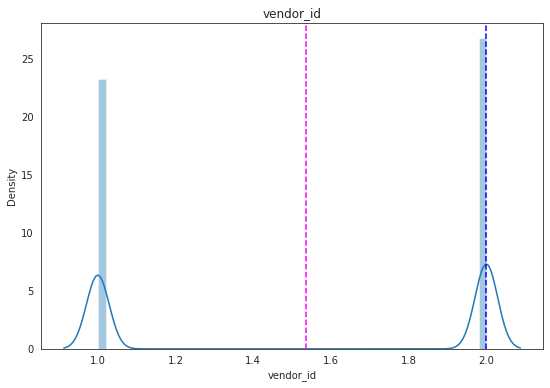

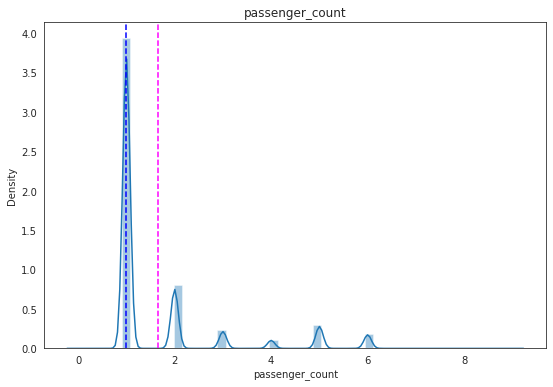

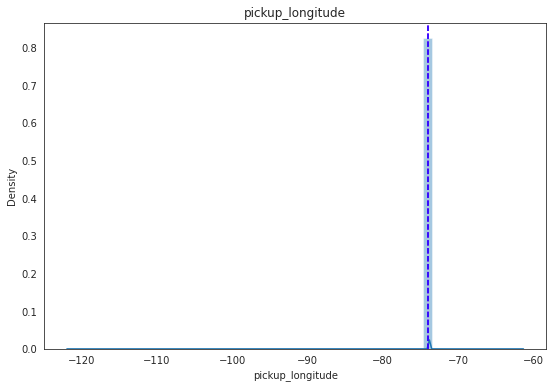

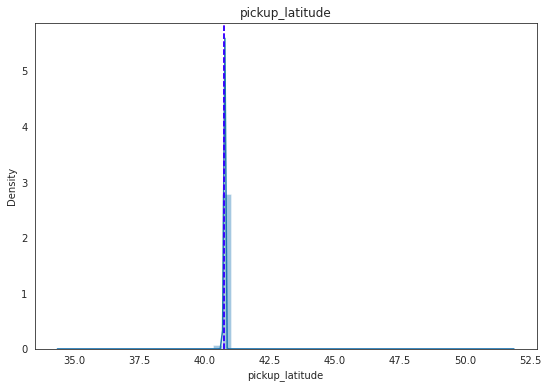

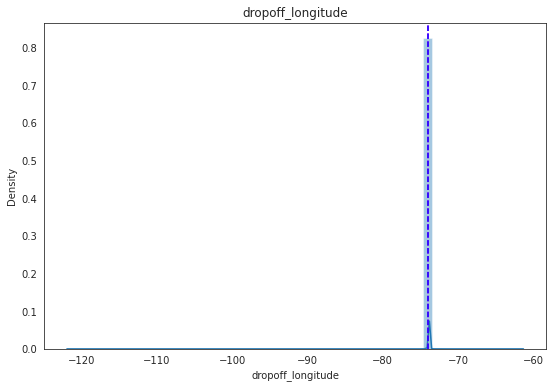

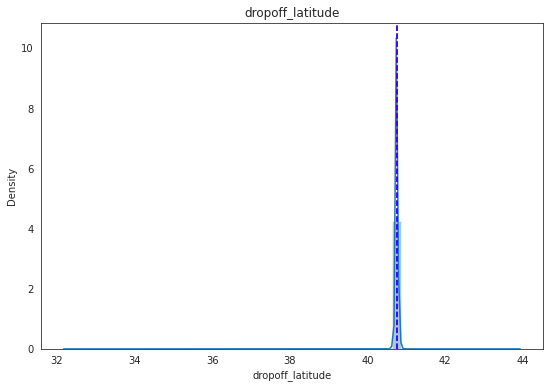

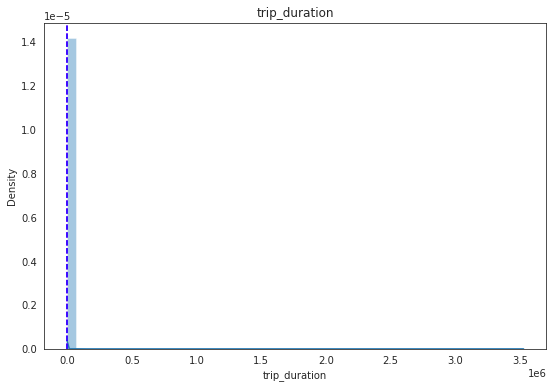

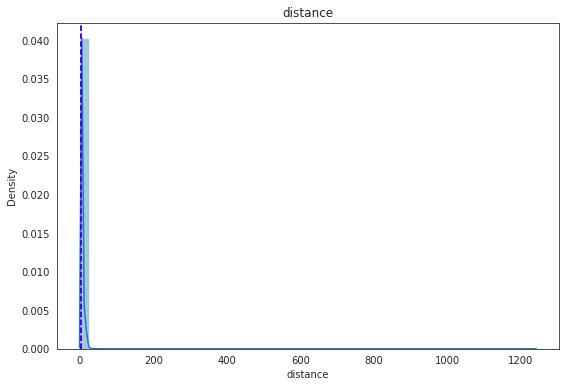

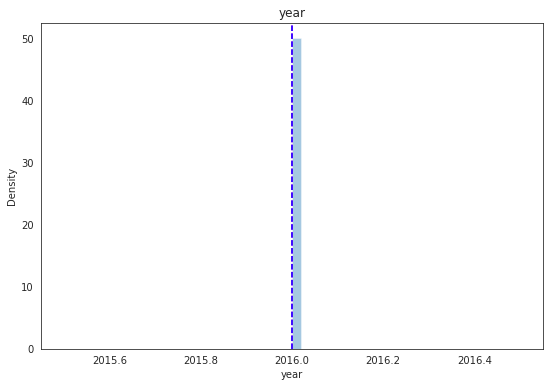

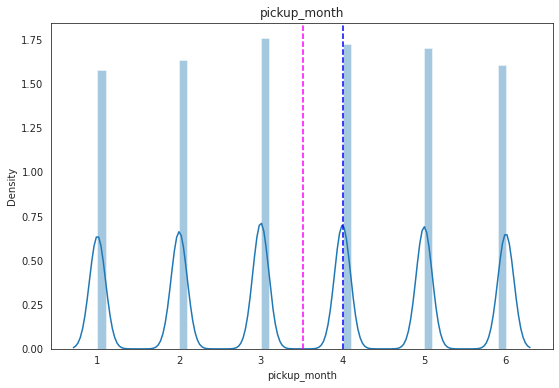

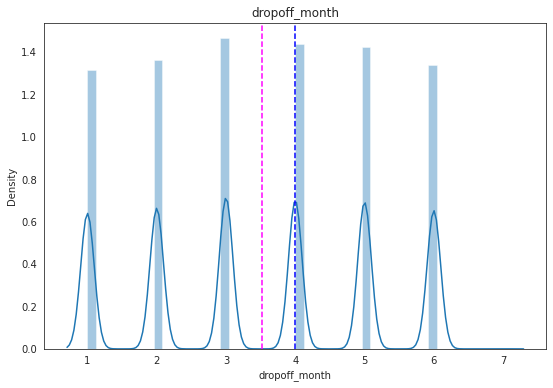

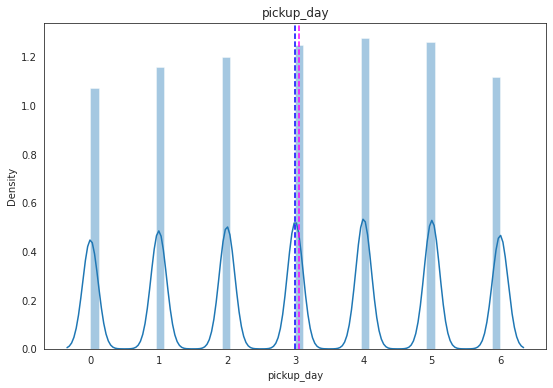

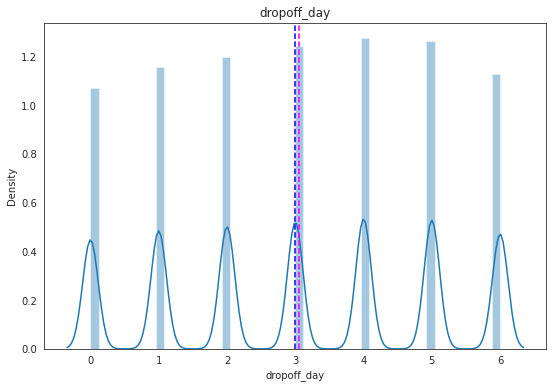

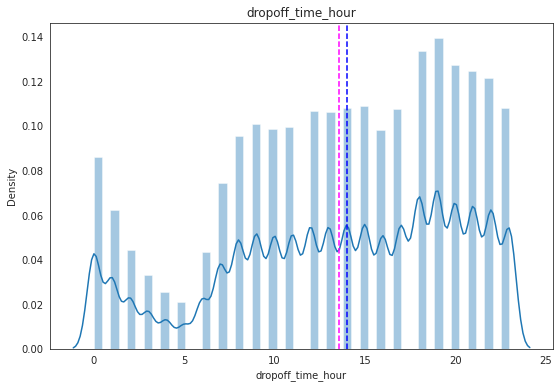

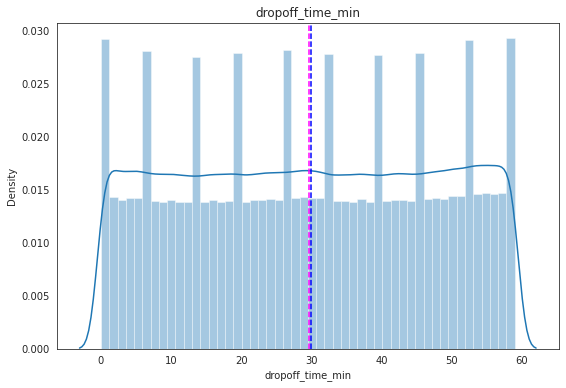

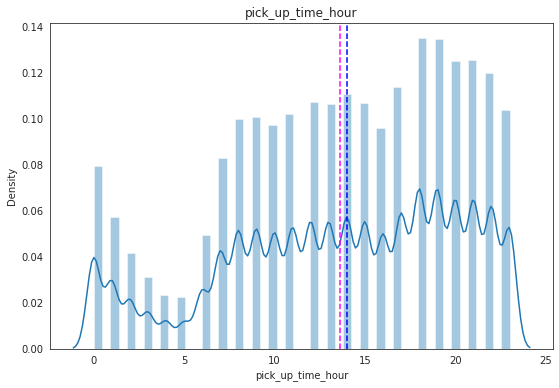

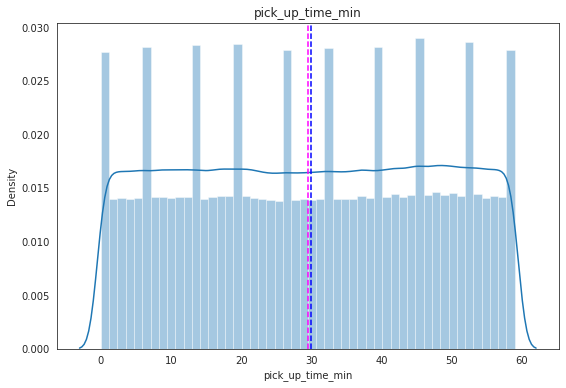

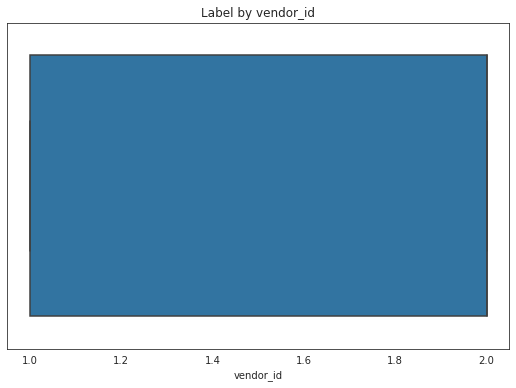

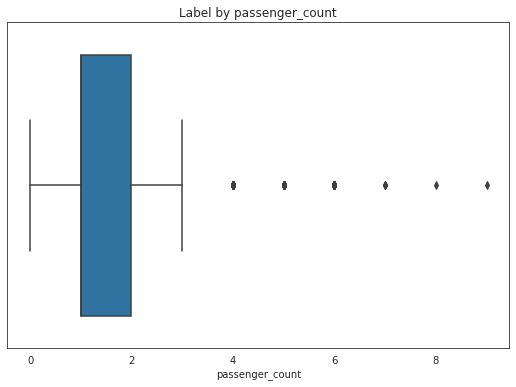

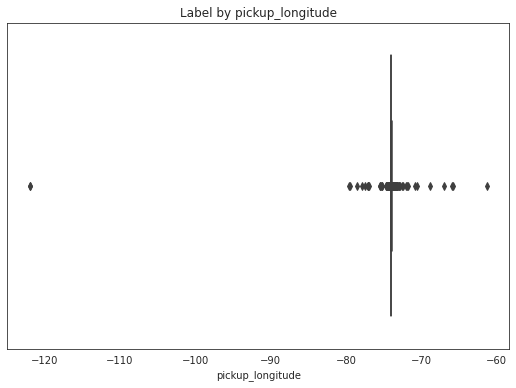

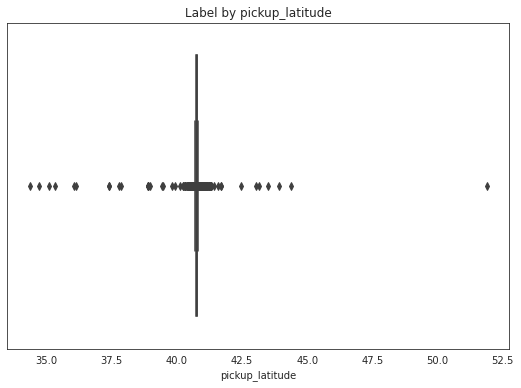

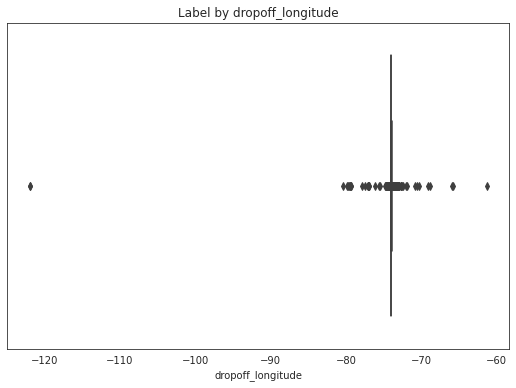

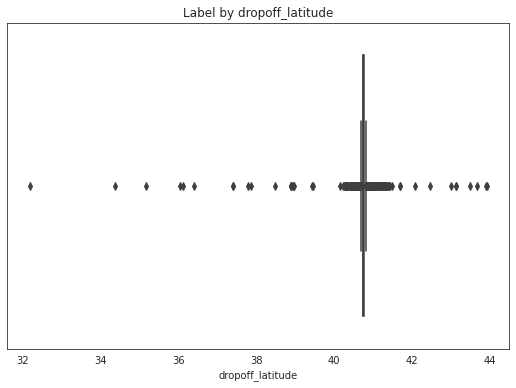

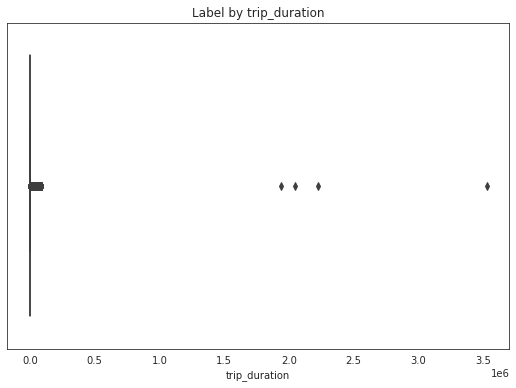

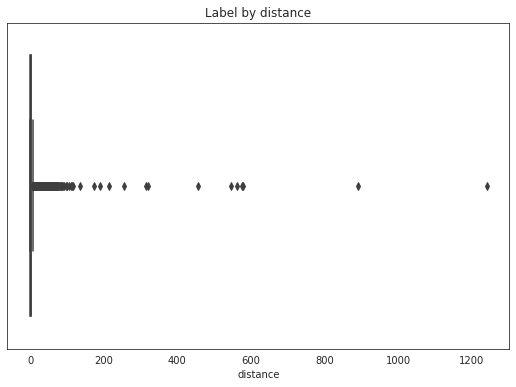

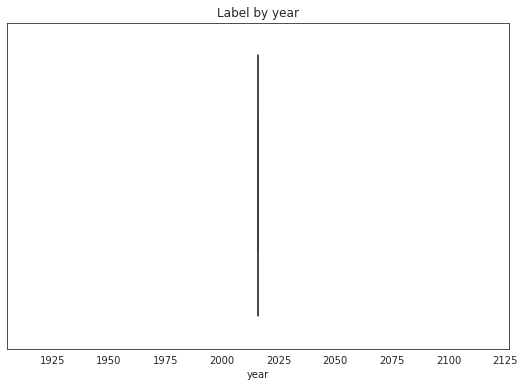

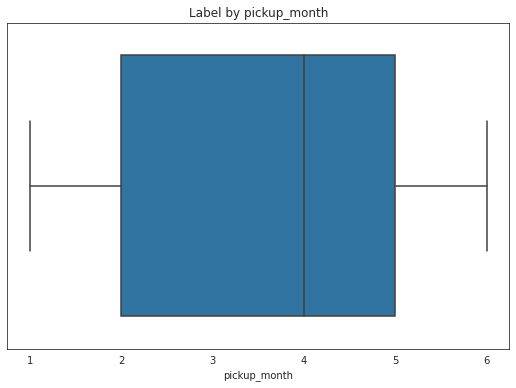

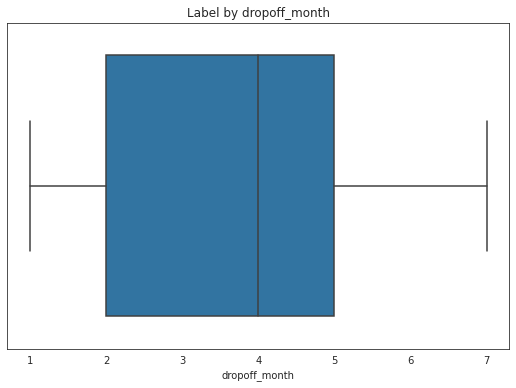

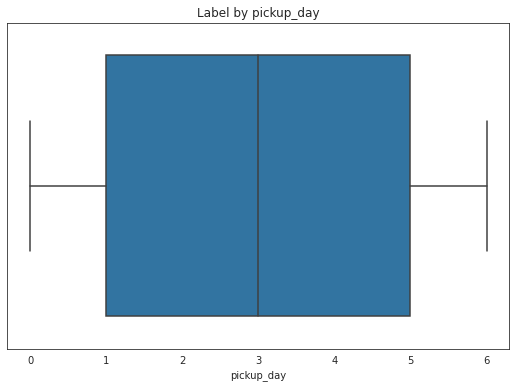

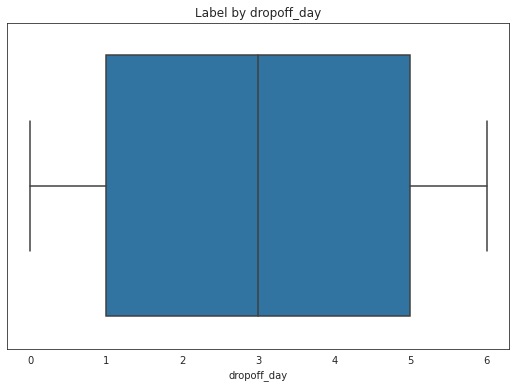

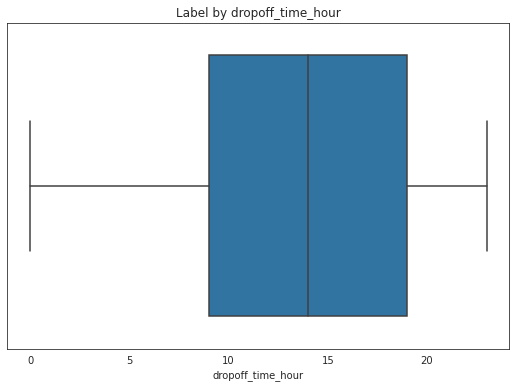

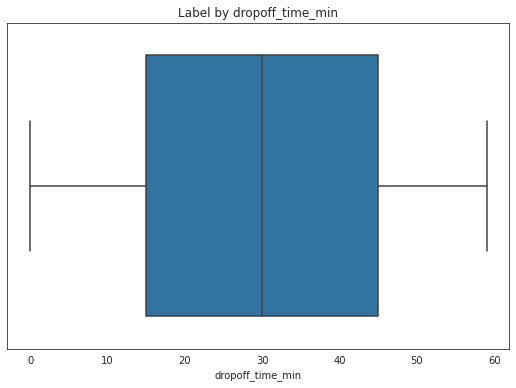

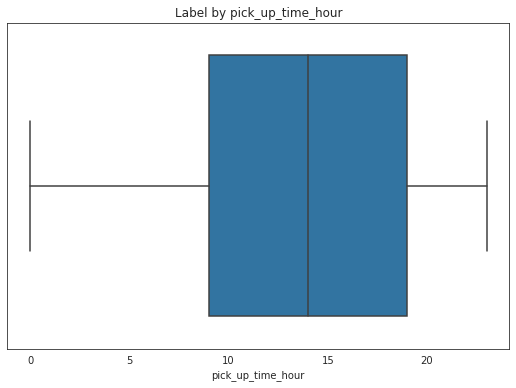

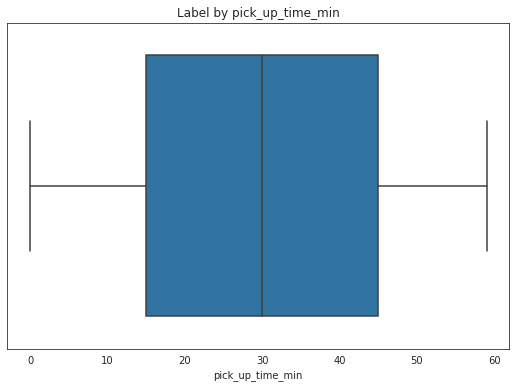

In [ ]:
from sqlalchemy.sql.base import elements
# Chart - 9 visualization code
# Visualizing code of hist plot for each columns to know the data distibution
for c in df.describe().columns:
  chart=plt.figure(figsize=(9,6))
  ax=chart.gca()
  feature= (df[c])
  sns.distplot(df[c])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed')
  ax.axvline(feature.median(),color='blue', linestyle='dashed')

  ax.set_title(c)
plt.show()


# Visualizing code of box plot for each columns to know the data distibution
for i in df.describe().columns:
    image = plt.figure(figsize=(9, 6))
    ax = image.gca()
    sns.boxplot(df[i])
    ax.set_title('Label by ' + i)
    #ax.set_ylabel("Churn")
plt.show()


##### 1. Why did you pick the specific chart?

The histogram is used to illustrate the major features of the distribution of the data in a convenient form It shows the frequency of numerical data using rectangles. The height of a rectangle (the vertical axis) represents the distribution frequency of a variable (the amount, or how often that variable appears).

Thus, I used the histogram plot to analyse the variable distributions over the whole dataset and to undersdtand its symmetricity.

Box  plots are very effective and easy to read, as they can summarize data from multiple sources and display the results in a single graph. Box and whisker plots allow for comparison of  data from different categories for easier, more effective decision-making by offering general information about a group of data's symmetry, skew, variance, and outliers.


Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

Almost all columns except 'pickup_time_hour' and dropoff_time_hour'are symmetrically distributed.However for most of the columns we can see that mean and median do not coincide.
In the boxplot we can see that  few of the columns like 'passenger_count' , 'trip_duration' , 'distance' , 'pickup_latitude'  , 'pickup_longitude' , 'dropoff_latitude' and 'dropoff_longitude' has outliers which has to be treated.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Just a histogram and box plot cannot define business impact. It's done just to see the distribution of the column data over the dataset.

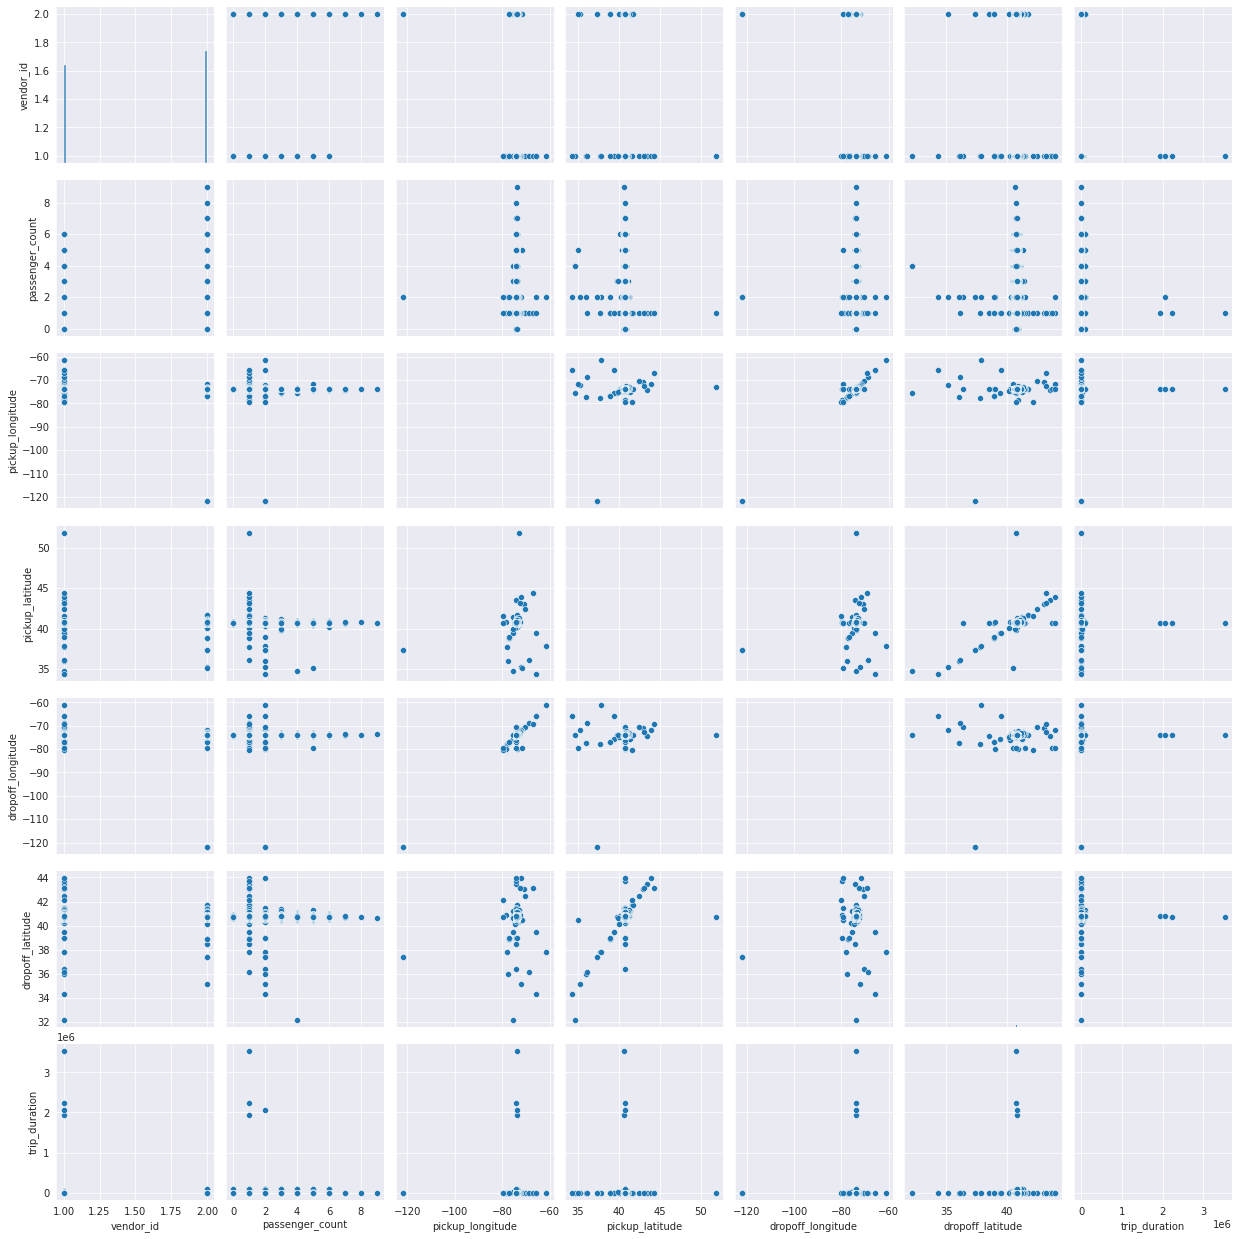

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

Therefore, I used pair plot to analyse the patterns of data and realationship between the features. It is very much same as the correlation map but here we can see the graphical representation of relationship between the pairs of vaariables.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there is a very less linear relationship between the variables of the dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Customers not churning with Voicemail plan have sent average of at least 30 number of voicemails.
2. Customers not churning having  customer care calls average of at most 2.
3. Customers churning have total average call minutes including day, evening, night and international calls is 215.

In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1
Customers not churning with Voicemail plan have sent average of at least 30 number of voicemails.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 30

Alternate Hypothesis : N < 30

Test Type: Left Tailed Test


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1=dataset[(dataset["Churn"]==False) & (dataset["Voice mail plan"]=="Yes")]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 30
sample_mean = hypo_1["Number vmail messages"].mean()
size = len(hypo_1)
std=(variance(hypo_1["Number vmail messages"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="Number vmail messages")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Customers not churning with Voicemail plan haven't sent at least 30 number of voicemails. But, we can see a maximum of 50 voice mails sent and sutomers aren't taking benefits of 50 messages although they have taken Voice Mail Plan.

##### Why did you choose the specific statistical test?

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["Number vmail messages"])
sns.distplot(hypo_1["Number vmail messages"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2
Customers not churning having customer care calls average of at most 4.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : N = 4

Alternate Hypothesis : N > 4

Test Type : Right Tailed Test



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_2=dataset[(dataset["Churn"]==False)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 2
sample_mean = hypo_2["Customer service calls"].mean()
size = len(hypo_2)
std=(variance(hypo_2["Customer service calls"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=hypo_2,col="Customer service calls")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis can't be rejected and Customers not churning having customer care calls average of at most 2. So, we can see a clear picture that average of 2-2.5 doesn't lead to customer churn. So, we should keep the customer queries resolution call average in betwwen 2-2.5.

##### Why did you choose the specific statistical test?

In [ ]:
mean_median_difference=hypo_2["Customer service calls"].mean()- hypo_2["Customer service calls"].median()
print("Mean Median Difference is :-",mean_median_difference)

As shown above the Mean median difference is around 0.4 and nearly zero. Mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 3
Customers churning have total average call minutes including day, evening, night and international calls is 215.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : mean = 215

Alternate Hypothesise : mean != 215

Type of Test : Two Tailed test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_3=dataset[(dataset["Churn"]==True)]
hypo_3["total call minutes"]=hypo_3["Total day minutes"]+hypo_3["Total eve minutes"]+hypo_3["Total night minutes"]+hypo_3["Total intl minutes"]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 500
sample_mean = hypo_3["total call minutes"].mean()
size = len(hypo_3)
std=(variance(hypo_3["total call minutes"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='d',t="true",hypothesis_number=hypothesis_number,df=hypo_3,col="total call minutes")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Customers churning haven't total average call minutes including day, evening, night and international calls is 215. It's more than 600.

##### Why did you choose the specific statistical test?

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_3["total call minutes"])
sns.distplot(hypo_3["total call minutes"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_3["total call minutes"].median()- hypo_3["total call minutes"].mean()
print("Mean Median Difference is :-",mean_median_difference)

From the above chart we can see median is greater than mean over 10. So, the distribution is postively skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Creating a copy of the dataset for further feature engineering
new_df=df.copy()
new_df.shape

(1458644, 21)

### 1. Handling Missing Values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
year                  0
pickup_month          0
dropoff_month         0
pickup_day            0
dropoff_day           0
dropoff_time_hour     0
dropoff_time_min      0
pick_up_time_hour     0
pick_up_time_min      0
distance              0
dtype: int64


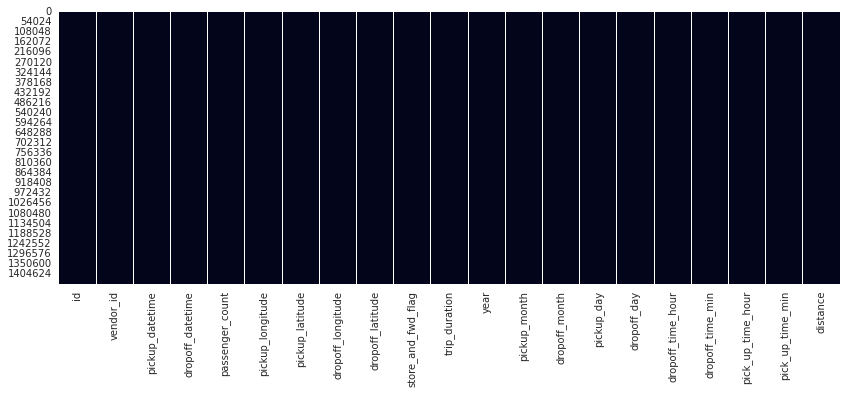

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_features=[]
non_symmetric_features=[]
for i in new_df.describe().columns:
  if abs(new_df[i].mean()-new_df[i].median())<0.1:
    non_symmetric_features.append(i)
  else:
    non_symmetric_features.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_features)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_features)

# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
#non_symmetric_feature.pop()


Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'year', 'pickup_month', 'dropoff_month', 'pickup_day', 'dropoff_day', 'dropoff_time_hour', 'dropoff_time_min', 'pick_up_time_hour', 'pick_up_time_min', 'distance']


In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_detection_skewedfeature(df1,feature):
  IQR= df1[feature].quantile(0.75)- df1[feature].quantile(0.25)
  lower_limit=df1[feature].quantile(0.25)-(1.5*IQR)
  upper_limit =df1[feature].quantile(0.75)+(1.5*IQR)
  return upper_limit,lower_limit

In [ ]:
# Restricting the data to lower and upper boundry
for c in non_symmetric_features :
  upper_limit_outlier , lower_limit_outlier=outlier_detection_skewedfeature(new_df,c)
  print("lower_limit for the feature=" , c,lower_limit_outlier)
  print("upper_limit for the feature=" ,c, upper_limit_outlier)
  taxi_trip=new_df[new_df[c]>lower_limit_outlier]
  taxi_trip=new_df[new_df[c]<upper_limit_outlier]
taxi_trip.shape


lower_limit for the feature= vendor_id -0.5
upper_limit for the feature= vendor_id 3.5
lower_limit for the feature= passenger_count -0.5
upper_limit for the feature= passenger_count 3.5
lower_limit for the feature= pickup_longitude -74.02867126464847
upper_limit for the feature= pickup_longitude -73.93052673339841
lower_limit for the feature= pickup_latitude 40.69082641601564
upper_limit for the feature= pickup_latitude 40.814880371093736
lower_limit for the feature= dropoff_longitude -74.03379440307617
upper_limit for the feature= dropoff_longitude -73.9205436706543
lower_limit for the feature= dropoff_latitude 40.684997081756606
upper_limit for the feature= dropoff_latitude 40.820697307586656
lower_limit for the feature= trip_duration -620.0
upper_limit for the feature= trip_duration 2092.0
lower_limit for the feature= year 2016.0
upper_limit for the feature= year 2016.0
lower_limit for the feature= pickup_month -2.5
upper_limit for the feature= pickup_month 9.5
lower_limit for the f

(1317971, 21)

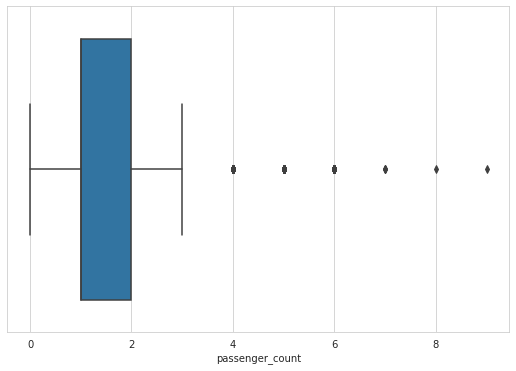

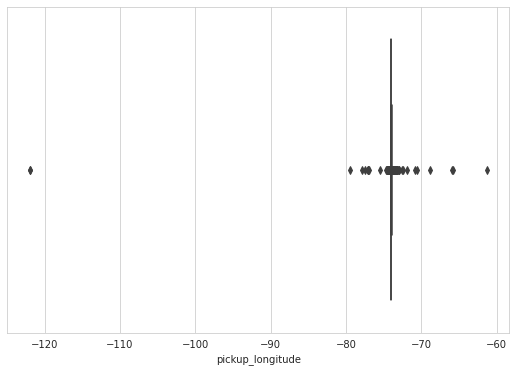

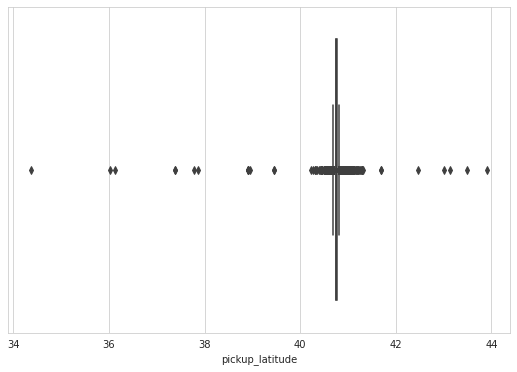

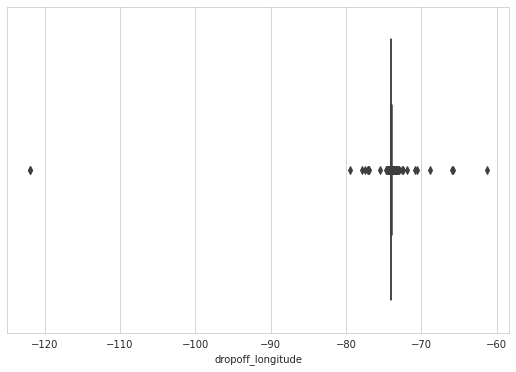

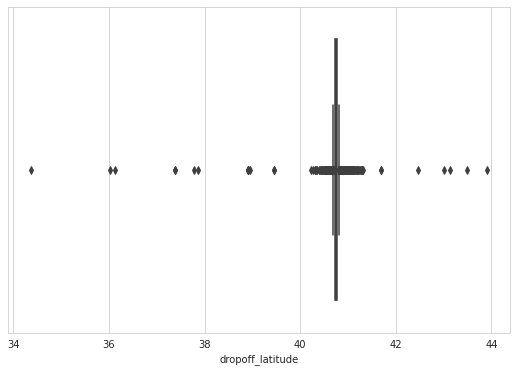

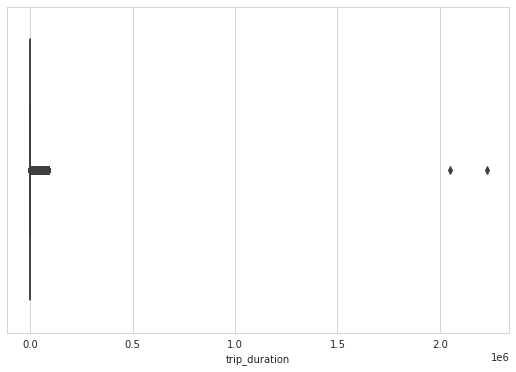

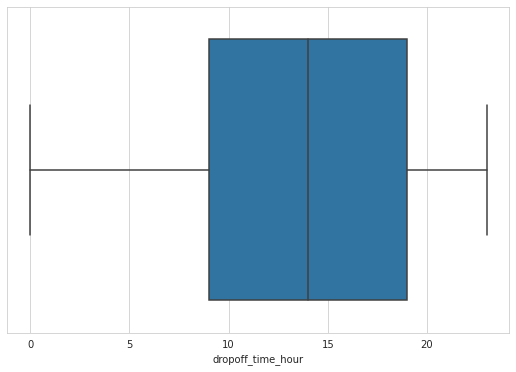

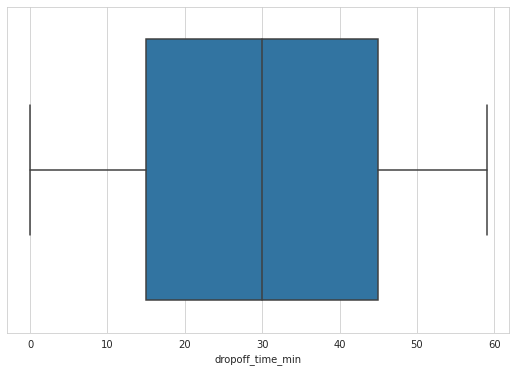

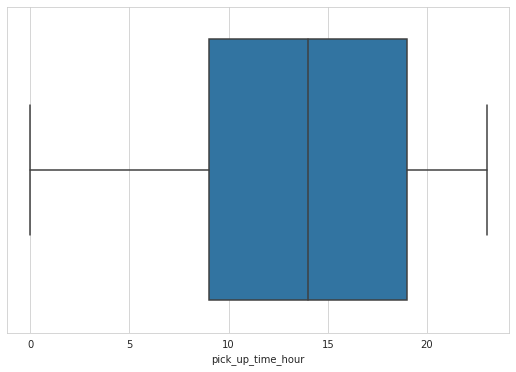

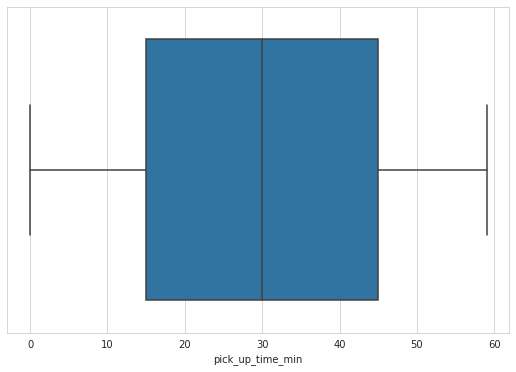

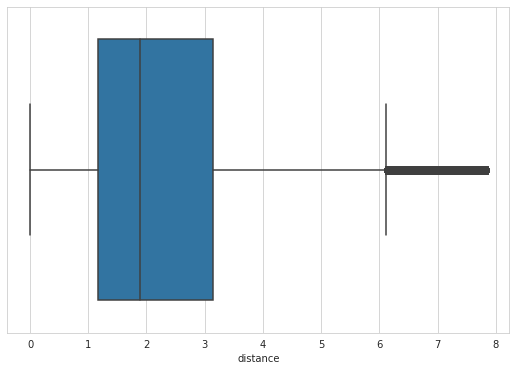

In [ ]:
# After Outlier Treatment showing the dataset distribution using box plot
# Visualising  code for the numerical columns 
for col in taxi_trip.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sns.boxplot(taxi_trip[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

First I separeted the symmetric and skew symmetric features in my dataset.Then I defined the upper limit and lower limits for each variable.Further I restricted the highest value of each column to the upper limit and the lowest value of each feature to the lower limit.Presence of outliners may cause problems during model fitting.Hence to avoid negative influence to the training process of machine learning algorithms and statistical analysis , outliner treatement is necessary.

In a Normal distribution where we have a symmetric curve and outliners are present , we can set the upper and lower boundaries by taking standard deviation into cosideration.However in the Taxi trip data set there are no features which are distributed normally.From the above code we can see that all the features are skewed in distribution.

### 3. Categorical Encoding

In [ ]:
categorical_columns=list(set(new_df.columns.to_list()).difference(set(new_df.describe().columns.to_list())))
categorical_columns

['id', 'pickup_datetime', 'store_and_fwd_flag', 'dropoff_datetime']

In [ ]:
#Encoding 'Store_and_fwd_flag' using One Hot Encoding
new_df=pd.get_dummies(new_df,columns = ['store_and_fwd_flag'])